In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
apple = pd.read_csv('data/Apple_stock.csv')
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


In [57]:
# 转换日期列数据，并设置其为索引列
apple.Date = pd.to_datetime(apple.Date)
apple = apple.set_index('Date')
apple.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [59]:
# 查看每一列的数据类型
   apple.columns = [col.strip() for col in apple.columns]

In [60]:
apple.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [62]:
# 有重复的日期吗？
apple.index.is_unique

True

In [66]:
# 找到每个月的最后一个交易日(business day)
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [67]:
# 数据集中最早的日期和最晚的日期相差多少天？
(apple.index.max() - apple.index.min()).days

12261

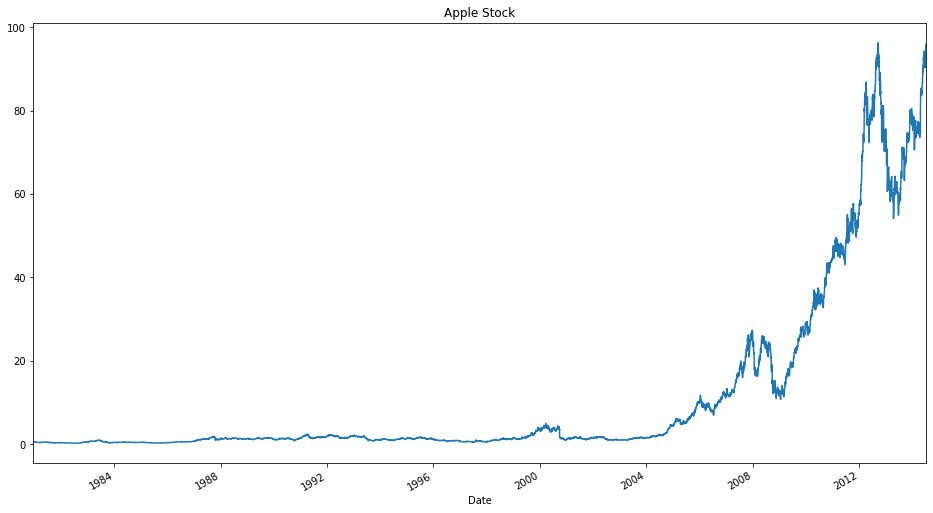

In [68]:
# 按照时间顺序可视化Adj Close值
apple_open = apple['Adj Close'].plot(title='Apple Stock')
fig = apple_open.get_figure()
fig.set_size_inches(16, 9)
plt.show()